# Plotting a more realistic earth model

Using NASA Blue Marble Next Generation

https://visibleearth.nasa.gov/collection/1484/blue-marble

https://neo.gsfc.nasa.gov/view.php?datasetId=BlueMarbleNG

There are 12 images from 2004, one for each month

The accessvis libary grabs all the imagery at full resolution and converts to cubemap textures, 

As an example we creates a sample animation blending the monthly images together to create a smooth transition through the year


In [1]:
import sys
import accessvis
import lavavu
import numpy as np
import math
import datetime
import os

In [2]:
accessvis.resolution_selection(default=2)

Low-res 2K - fast for testing
Mid-res 4K - good enough for full earth views
High res 8K - better if showing close up at country scale
Ultra-high 16K - max detail but requires a fast GPU with high memory


Dropdown(description='Detail:', index=1, options=(('Low-res 2K', 1), ('Mid-res 4K', 2), ('High-res 8K', 3), ('…

In [3]:
accessvis.settings

resolution 2, 10800, texture 4096, grid 2048, maxgrid 4096 basedir Earth

# Visualise in 3D


In [4]:
dt = datetime.datetime(2024, 1, 1, 12, 0, 0)
lv = accessvis.plot_earth(waves=True, when=dt, blendtex=False, vertical_exaggeration=15) #sunlight=True)


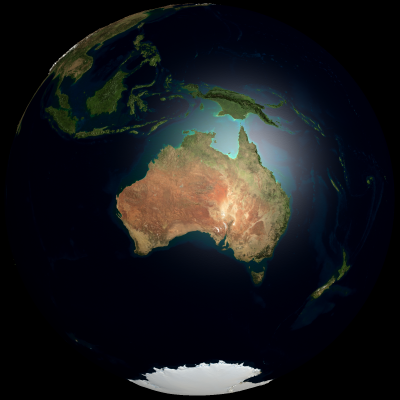

In [5]:
lv.reset()

#Zoom out
lv.translation(0.0, 0.0, -17)

#lv.rotation(0.0, -125.0, 0.0) #Australia view
#lv.rotation(0.0, 0.0, 0.0) #Prime meridian view

#Australia centred
lv.rotation([-145, -42, 160])

lv.display((400,400))


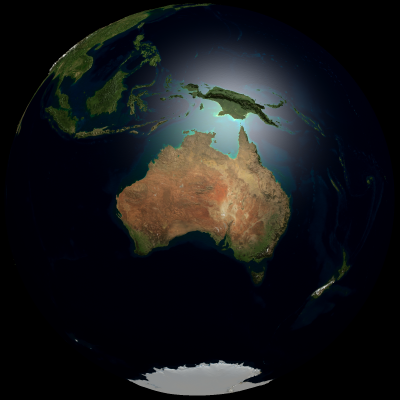

In [6]:
#Change date
dt = datetime.datetime(2024, 8, 1, 12, 0, 0)
accessvis.update_earth_datetime(lv, when=dt, sunlight=True)
lv.display((400,400))

### Lighting etc

(including accurate sun positioning using astropy)


In [ ]:
#Reset camera
lv.reset()
lv.translation(0.0, 0.0, -17)
lv.rotation([-145, -42, 160])


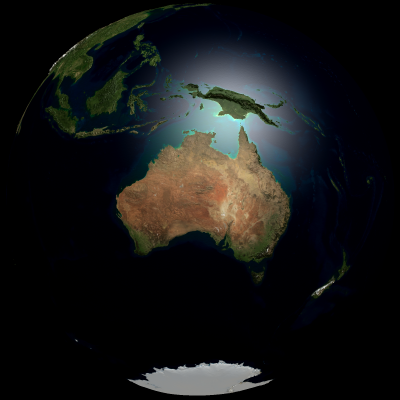

In [7]:
#Shading/colour/lighting settings
#lv.brightness_contrast_saturation(0.55, 0.625, 0.375)
#lv.brightness_contrast_saturation(0.5, 0.5, 0.4)
#lv.brightness_contrast_saturation(0.5, 0.5, 0.5)

lv.brightness_contrast_saturation(0.5, 0.525, 0.45)
lv.display((400,400))

#Setup lighting
#lv.set_properties(diffuse=0.6, ambient=0.6, specular=0.3, shininess=0.04, light=[1,1,0.98,1], lightpos=accessvis.sun_light())
lv.set_properties(diffuse=0.4, ambient=0.65, specular=0.4, shininess=0.04, light=[1,1,0.98,1], lightpos=accessvis.sun_light())


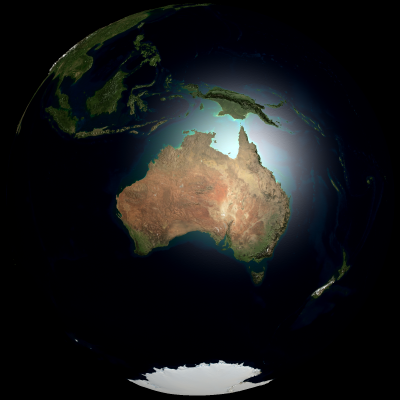

In [8]:
lv.display((400,400))

In [9]:
SP = accessvis.sun_light()
SP

array([ 52632.03112289,  52632.03112289, 131580.07780723])

In [10]:
#Get sun position at current time
lp = accessvis.sun_light(now=True)
print(lp)
#Setup lighting
#lv.set_properties(lightpos=lp)
#lv.set_properties(lightpos=[60740.0, 60740.0, 121850])
#lv.set_properties(lightpos=LPOLD)

[133733.2959551471, -8422.189890387624, -66909.81251037016, 1]


In [11]:
# 151.17 million km
# 151170 million m

In [12]:
np.linalg.norm(lp)
lv.set_properties(lightpos=lp)


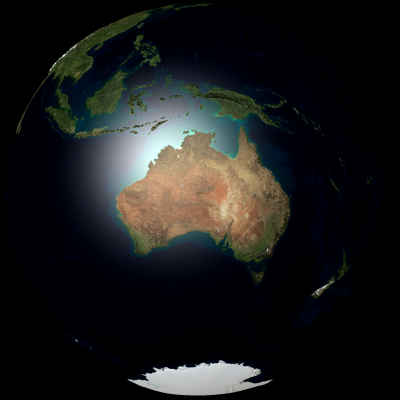

In [13]:
lv.display((400,400))

In [14]:
#Get sun position at specific hour
lp = accessvis.sun_light(hour=8)
print(lp)
#Setup lighting
lv.set_properties(lightpos=lp)

[-66956.25397947099, -8169.631568224116, -133737.62522863172, 1]



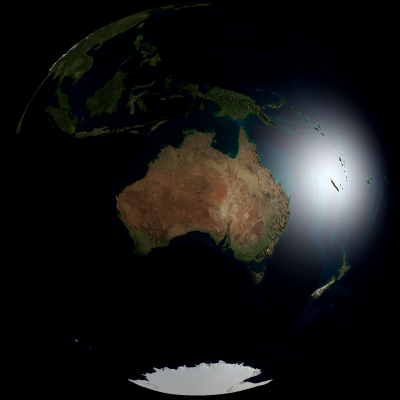

In [15]:
lv.display((400,400))

In [16]:
#Restore floating sun position (sun stays behind camera)
lv.set_properties(lightpos=accessvis.sun_light(now=True))


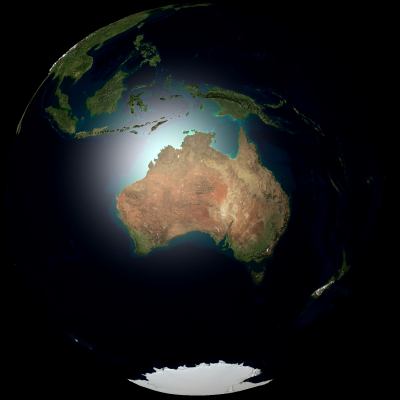

In [17]:
lv.display((400,400))

---

# Animation

Load seasonal textures and smoothly transition between them

WORK IN PROGRESS 
(TODO: not possible at full 16K tex res unless we use compressed textures, even on RTX 4090)

In [ ]:
#Use local lavavu for debugging
import sys
sys.path.insert(0, '../../LavaVu')
sys.path.insert(0, '..') #for accessvis module
import accessvis
import datetime

In [ ]:
accessvis.resolution_selection(default=3)

In [ ]:
#lv = accessvis.plot_earth(sunlight=True)
dt = datetime.datetime(2024, 1, 1, 12, 0, 0)
lv = accessvis.plot_earth(waves=True, when=dt, blendtex=True, vertical_exaggeration=15) #sunlight=True)

In [ ]:
#Shading/colour/lighting settings
lv.brightness_contrast_saturation(0.5, 0.525, 0.45)

#Setup lighting
#lv.set_properties(diffuse=0.6, ambient=0.6, specular=0.3, shininess=0.04, light=[1,1,0.98,1], lightpos=accessvis.sun_light())
lv.set_properties(diffuse=0.4, ambient=0.65, specular=0.4, shininess=0.045, light=[1,1,0.98,1], lightpos=accessvis.sun_light())

In [ ]:
lv.resize(1440,1440)

In [ ]:
lv.reset() #Reset view
#Northern hemisphere view for snow
#lv.rotation(25.507, -27.293, -19.359)
#lv.rotation(90.0, 0.0, 0.0)
lv.translation(0.0, 0.0, -16.75)
#lv.rotation(62.829, -0.619, -0.903)
#lv.rotation(25.767, -17.675, -10.946)
lv.rotation(40.775, -38.462, -21.42)

#Australia view
#lv.rotation(0.0, -125.0, 0.0) 


In [ ]:
#lv.interactive()

In [ ]:
from tqdm.notebook import tqdm
rot = 0
rinc = 0.02
with lv.video(filename='TESTv6.mp4', quality=3, resolution=(1440,1440), width=1440//2, height=1080//2, params="autoplay") as v:    
    step = 1 #2
    for d in tqdm(range(0,366,step), desc='Day'):
        #rot += (rinc * 4) #4 minutes per degree
        #hour = 12 + int(rot // 60)
        #minute = int(rot % 60)
        #dt = datetime.datetime.strptime(f'04 {str(d+1).zfill(3)} {hour}:{minute}', '%y %j %H:%M')
        dt = datetime.datetime.strptime(f'04 {str(d+1).zfill(3)} 12:00', '%y %j %H:%M')
        dt = dt.replace(tzinfo=datetime.timezone.utc)
        #print(rot, hour, minute, dt)
        #v.pause()
        accessvis.update_earth_datetime(lv, when=dt, sunlight=True)
        #v.pause()       
        lv["title"] = '+' + dt.strftime("%d/%m/%Y")
        lv.rotate('y', rinc) #Rotate about axis too
        lv.render()

    #Final frames
    for f in range(30):
        lv.rotate('y', rinc)
        lv.render()


In [ ]:
#(previous render time 30 minutes at 8K tex res)